# 파일 합치기

출처: https://www.codegrepper.com/code-examples/python/how+to+merge+multiple+excel+files+into+a+single+files+with+python

In [1]:
import os
import pandas as pd

df=pd.DataFrame()
for n in [2019,2020,2021]:
    cwd= os.path.abspath(r'C:\Users\chels\OneDrive\Documents\GitHub\KDT_Project\data\{}'.format(n)) #KDT_Project\data 까지의 주소 + \{}
    files = os.listdir(cwd)

    for file in files:
        if file.endswith('.xlsx'):
            data = pd.read_excel(cwd+'\\'+file,index_col = 0)
            df_temp=pd.DataFrame(data)
            df_temp['기간'] = file[-12:-5]
            df_temp= df_temp[['기간', '제목', '가수', '앨범', '발매일', '장르']]
            df = df.append(df_temp)

In [2]:
df['순위'] = df.index+1
df= df[['기간','순위','제목', '가수', '앨범', '발매일', '장르']]

In [3]:
index = [item for item in range(0,1500)]
df.index=index
df.to_excel('total_music_chart.xlsx')
df

,기간,순위,제목,가수,앨범,발매일,장르
0,2019.01,1,넘쳐흘러,엠씨더맥스 (M.C the MAX),Circular,2019.01.02,발라드
1,2019.01,2,벌써 12시,청하,벌써 12시,2019.01.02,댄스
2,2019.01,3,180도,벤,180˚,2018.12.07,발라드
3,2019.01,4,신용재,하은,신용재,2018.11.06,발라드
4,2019.01,5,SOLO,제니 (JENNIE),SOLO,2018.11.12,랩/힙합
...,...,...,...,...,...,...,...
1495,2021.06,46,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,멜로가 체질 OST Part 3,2019.08.23,"록/메탈, 국내드라마"
1496,2021.06,47,봄날,방탄소년단,YOU NEVER WALK ALONE,2017.02.13,랩/힙합
1497,2021.06,48,그냥 안아달란 말야,다비치,그냥 안아달란 말야,2021.04.12,발라드
1498,2021.06,49,2002,Anne-Marie,Speak Your Mind (Deluxe),2018.08.03,POP


# 전체 기간 중 선호장르 

In [4]:
# 'df_o'에 일단 원본을 백업해놓자
df_o = df
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#'연도','달' 항목을 따로 만들기 + 숫자로 된 데이터가 없길래 혹시몰라 count 칼럼 만들어 그냥 숫자 1 넣어놓음
year = list()
month = list()
for t in df['기간']:
    year.append(t[:4])
    month.append(t[5:])

df['연도'] = year
df['달'] = month
df['count'] = 1
df= df[['기간','연도','달','순위','제목', '가수', '앨범', '발매일', '장르','count']]
df

,기간,연도,달,순위,제목,가수,앨범,발매일,장르,count
0,2019.01,2019,01,1,넘쳐흘러,엠씨더맥스 (M.C the MAX),Circular,2019.01.02,발라드,1
1,2019.01,2019,01,2,벌써 12시,청하,벌써 12시,2019.01.02,댄스,1
2,2019.01,2019,01,3,180도,벤,180˚,2018.12.07,발라드,1
3,2019.01,2019,01,4,신용재,하은,신용재,2018.11.06,발라드,1
4,2019.01,2019,01,5,SOLO,제니 (JENNIE),SOLO,2018.11.12,랩/힙합,1
...,...,...,...,...,...,...,...,...,...,...
1495,2021.06,2021,06,46,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,멜로가 체질 OST Part 3,2019.08.23,"록/메탈, 국내드라마",1
1496,2021.06,2021,06,47,봄날,방탄소년단,YOU NEVER WALK ALONE,2017.02.13,랩/힙합,1
1497,2021.06,2021,06,48,그냥 안아달란 말야,다비치,그냥 안아달란 말야,2021.04.12,발라드,1
1498,2021.06,2021,06,49,2002,Anne-Marie,Speak Your Mind (Deluxe),2018.08.03,POP,1


# count plot 이용해서 전체 기간 바플롯 그리기

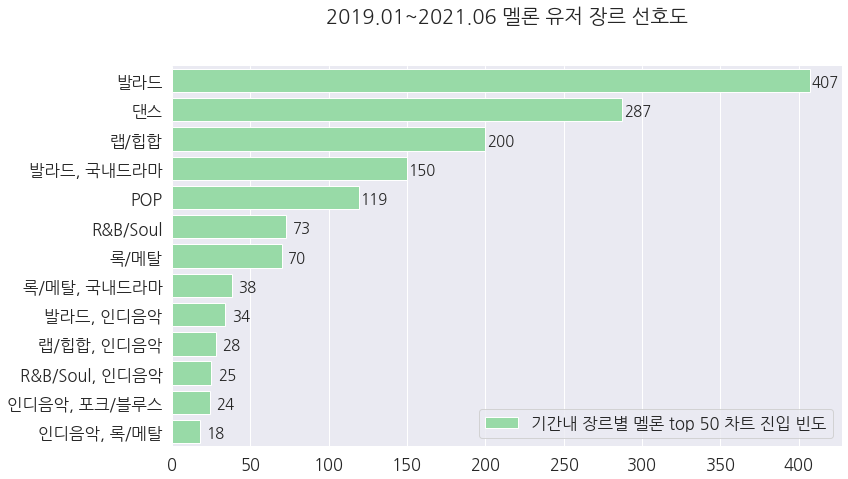

In [6]:
# 2019 ~ 2021년 6월 사이 멜론 차트 top 50 장르

#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)

#matplot figure 불러오기
f, ax = plt.subplots(figsize=(12, 7))

#plot 짜기
sns.countplot(y='장르', data=df,
             label = '기간내 장르별 멜론 top 50 차트 진입 빈도',
#              order = df['장르'].value_counts().index, #descending index
              order=df['장르'].value_counts().iloc[:13].index, #descending index til 13th value
             color='g')

#annotation 넣기
for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(),
             p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),  # 왜인진 모르겠지만 괄호 속 숫자는 소수점을 나타냄 :1.0f(소숫점 0자리) , :1.1f(소숫점 1자리)
             ha='center', va='center',
            size=15) #폰트 사이즈 조절

#title, legend 넣기
ax.set_title('2019.01~2021.06 멜론 유저 장르 선호도', y =1.1, fontsize =20)
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="")
sns.despine(left=True, bottom=True)

plt.show()

## stacked bar plot 형태로 만들기 (그냥 플롯 두개 겹쳤어요)

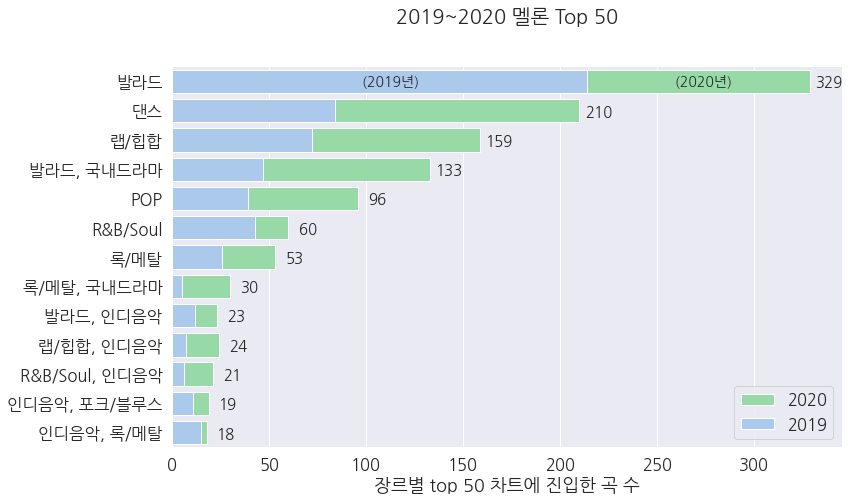

In [7]:
# 2019 ~ 2021년 6월 사이 멜론 차트 top 50 장르

#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.5)
sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)

#matplot figure 불러오기
f, ax = plt.subplots(figsize=(12, 7))

#plot 짜기

sns.countplot(y='장르', data=df.loc[(df.연도=='2020') | (df.연도=='2019')],
             label = '2020',
              order=df['장르'].value_counts().iloc[:13].index, #13번째 값까지 내림차순(그 밑은 값이 넘 작어서 자름)
             color='g'
             )

#annotation 넣기
for p in ax.patches:
    width = p.get_width()
    plt.text(10+p.get_width(),
             p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),  # 괄호 속 숫자는 소수점을 나타냄 :1.0f(소숫점 0자리) , :1.1f(소숫점 1자리)
             ha='center', va='center',
            size=15) #폰트 사이즈 조절

#2019년 plot 짜기
sns.countplot(y='장르', data=df.loc[df.연도=='2019'],
             label = '2019',
              order=df['장르'].value_counts().iloc[:13].index, #13번째 값까지 내림차순(그 밑은 값이 넘 작어서 자름)
             color='b'
             )

#2019년과 2020년 annotation 넣기
ax.text(98,0.15, '(2019년)                                                                  (2020년)'
       ,size=14)


#title, legend 넣기
ax.set_title('2019~2020 멜론 Top 50', y =1.1, fontsize =20)
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="장르별 top 50 차트에 진입한 곡 수")
sns.despine(left=True, bottom=True)

plt.show()

- 2019년(코로나 이전)에 비해 2020년(코로나 발생)에는 발라드 곡을 잘 듣지 않았다
- 드라마 관련 발라드 곡은 2020년에 더 많이 들었다. 하지만 발라드와 댄스의 전체 트랜드를 뒤집을 정도는 아니다.
- 2020년엔 2019년보다 댄스곡,pop이 더 유행했고, 그 외엔 록/메탈(국내드라마),랩/힙합(인디음악),R&B/Soul(인디음악)의 유행이 더 두드러진다.

<결론>
- 코로나가 발생하기 이전인 2019년에 비해 코로나 판데믹이 시작된 2020년에는 발라드 곡의 인기가 떨어지고 댄스곡과 POP의 인기가 증가했다. 또한 드라마 관련 ost들도 2020년에 더 유행했다. 록,메탈, 랩, 힙합 등의 인디음악도 2020년에 더 인기가 많았다.

<원인?>

- 가설1 : 코로나 판데믹이 시작되며 카페나 식당이 문을 닫아 보통 카페에서 많이 플레이하는 잔잔한 음악의 재생 수가 줄었다.
- 가설2 : 코로나 판데믹이 시작되며 사람들이 심리적으로 발라드보다는 댄스 음악을 더 듣게 되었다.
- 가설3 : 코로나 판데믹이 시작되며 사람들이 드라마를 많이 보게 되어 드라마 ost들이 더 유행했다.
- 가설4 : 코로나와 관계 없이 변한거다.
- 가설5 : 다 틀렸고 사실 2019년 데이터가 특이한거다.

# 장르를 딱 세개만 남기고 월별로 정리해봄

### 피벗 테이블로 간단하게 추세 확인하기

<AxesSubplot:xlabel='장르'>

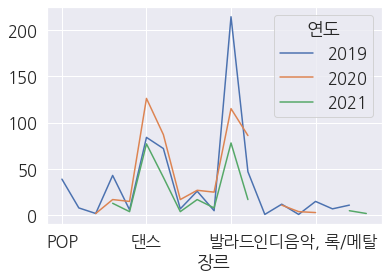

In [8]:
df.pivot_table('count', index='장르', columns='연도', aggfunc='sum').plot()
# 자세히는 안보이지만 2019년도에 비해 2020년에는 댄스장르가 더 유행했고 발라드 장르 선호가 크게 감소한거같다.
# 발라드, 댄스, 드라마ost, 영화ost 값의 변화가 두드러진다는 점 발견

### 피벗 테이블로 장르count -기간 데이터 만들기
- 우리가 원하는 것은 장르 별로 얼만큼 음악을 들었느냐니까 데이터 count가 필요함 = 피벗데이터로

In [9]:
df[['기간','연도','달','장르','count']]
df_groups = df.groupby(['기간','장르']).count()
df_groups

연도   달  순위  제목  가수  앨범  발매일  count
기간      장르                                             
2019.01 POP           1   1   1   1   1   1    1      1
        R&B/Soul      5   5   5   5   5   5    5      5
        댄스            9   9   9   9   9   9    9      9
        랩/힙합         10  10  10  10  10  10   10     10
        록/메탈          1   1   1   1   1   1    1      1
...                  ..  ..  ..  ..  ..  ..  ...    ...
2021.06 록/메탈          4   4   4   4   4   4    4      4
        록/메탈, 국내드라마   1   1   1   1   1   1    1      1
        발라드           9   9   9   9   9   9    9      9
        발라드, 국내드라마    1   1   1   1   1   1    1      1
        발라드, 인디음악     1   1   1   1   1   1    1      1

[349 rows x 8 columns]

In [10]:
#nan 값을 0으로 바꿔준다 (안하면 나중에 오류남)
a=df_groups.unstack()['count']
a=a.fillna(0)
a.head()

장르,POP,"POP, 국외영화","POP, 애니메이션/웹툰, 키즈, 만화",R&B/Soul,"R&B/Soul, 인디음악",댄스,랩/힙합,"랩/힙합, 인디음악",록/메탈,"록/메탈, 국내드라마",발라드,"발라드, 국내드라마","발라드, 애니메이션/웹툰, 키즈, 만화","발라드, 인디음악",성인가요,"인디음악, 록/메탈","인디음악, 일렉트로니카","인디음악, 포크/블루스",포크/블루스
기간,,,,,,,,,,,,,,,,,,,
2019.01,1.0,0.0,0.0,5.0,0.0,9.0,10.0,0.0,1.0,0.0,20.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2019.02,2.0,0.0,0.0,4.0,0.0,10.0,9.0,1.0,1.0,1.0,19.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2019.03,2.0,0.0,0.0,5.0,0.0,8.0,7.0,1.0,2.0,0.0,19.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
2019.04,2.0,0.0,0.0,4.0,0.0,7.0,9.0,1.0,3.0,0.0,14.0,2.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0
2019.05,4.0,0.0,0.0,3.0,0.0,8.0,8.0,1.0,3.0,0.0,15.0,1.0,0.0,1.0,0.0,3.0,1.0,2.0,0.0


### 장르별로 그룹 합쳐줌(발라드는 발라드끼리)
- 조사하고자하는 것이 무엇이냐에 따라 어떤 데이터를 합칠지는 달라질듯(ex. 코로나 때 인디음악이 더 선호됐나? 를 조사하려면 인디음악 장르끼리 합쳐야..)

In [11]:
# 발라드는 발라드, 인디음악과 합침
a['발라드']=a['발라드']+a['발라드, 인디음악']
a=a.drop('발라드, 인디음악',axis=1)
a.head()

장르,POP,"POP, 국외영화","POP, 애니메이션/웹툰, 키즈, 만화",R&B/Soul,"R&B/Soul, 인디음악",댄스,랩/힙합,"랩/힙합, 인디음악",록/메탈,"록/메탈, 국내드라마",발라드,"발라드, 국내드라마","발라드, 애니메이션/웹툰, 키즈, 만화",성인가요,"인디음악, 록/메탈","인디음악, 일렉트로니카","인디음악, 포크/블루스",포크/블루스
기간,,,,,,,,,,,,,,,,,,
2019.01,1.0,0.0,0.0,5.0,0.0,9.0,10.0,0.0,1.0,0.0,20.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0
2019.02,2.0,0.0,0.0,4.0,0.0,10.0,9.0,1.0,1.0,1.0,19.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0
2019.03,2.0,0.0,0.0,5.0,0.0,8.0,7.0,1.0,2.0,0.0,20.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0
2019.04,2.0,0.0,0.0,4.0,0.0,7.0,9.0,1.0,3.0,0.0,15.0,2.0,0.0,0.0,2.0,1.0,4.0,0.0
2019.05,4.0,0.0,0.0,3.0,0.0,8.0,8.0,1.0,3.0,0.0,16.0,1.0,0.0,0.0,3.0,1.0,2.0,0.0


In [12]:
#드라마 ost 합침
a['드라마 OST']=a['록/메탈, 국내드라마']+a['발라드, 국내드라마']
a=a.drop(['록/메탈, 국내드라마','발라드, 국내드라마'],axis=1)
a.head()

장르,POP,"POP, 국외영화","POP, 애니메이션/웹툰, 키즈, 만화",R&B/Soul,"R&B/Soul, 인디음악",댄스,랩/힙합,"랩/힙합, 인디음악",록/메탈,발라드,"발라드, 애니메이션/웹툰, 키즈, 만화",성인가요,"인디음악, 록/메탈","인디음악, 일렉트로니카","인디음악, 포크/블루스",포크/블루스,드라마 OST
기간,,,,,,,,,,,,,,,,,
2019.01,1.0,0.0,0.0,5.0,0.0,9.0,10.0,0.0,1.0,20.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2019.02,2.0,0.0,0.0,4.0,0.0,10.0,9.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2019.03,2.0,0.0,0.0,5.0,0.0,8.0,7.0,1.0,2.0,20.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0
2019.04,2.0,0.0,0.0,4.0,0.0,7.0,9.0,1.0,3.0,15.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0
2019.05,4.0,0.0,0.0,3.0,0.0,8.0,8.0,1.0,3.0,16.0,0.0,0.0,3.0,1.0,2.0,0.0,1.0


In [13]:
a

장르,POP,"POP, 국외영화","POP, 애니메이션/웹툰, 키즈, 만화",R&B/Soul,"R&B/Soul, 인디음악",댄스,랩/힙합,"랩/힙합, 인디음악",록/메탈,발라드,"발라드, 애니메이션/웹툰, 키즈, 만화",성인가요,"인디음악, 록/메탈","인디음악, 일렉트로니카","인디음악, 포크/블루스",포크/블루스,드라마 OST
기간,,,,,,,,,,,,,,,,,
2019.01,1.0,0.0,0.0,5.0,0.0,9.0,10.0,0.0,1.0,20.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2019.02,2.0,0.0,0.0,4.0,0.0,10.0,9.0,1.0,1.0,19.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2019.03,2.0,0.0,0.0,5.0,0.0,8.0,7.0,1.0,2.0,20.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0
2019.04,2.0,0.0,0.0,4.0,0.0,7.0,9.0,1.0,3.0,15.0,0.0,0.0,2.0,1.0,4.0,0.0,2.0
2019.05,4.0,0.0,0.0,3.0,0.0,8.0,8.0,1.0,3.0,16.0,0.0,0.0,3.0,1.0,2.0,0.0,1.0
2019.06,3.0,2.0,0.0,4.0,0.0,6.0,7.0,2.0,3.0,15.0,0.0,1.0,3.0,1.0,2.0,0.0,1.0
2019.07,4.0,2.0,0.0,3.0,1.0,11.0,5.0,1.0,2.0,17.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0
2019.08,4.0,2.0,0.0,3.0,1.0,5.0,2.0,0.0,2.0,18.0,0.0,0.0,1.0,0.0,1.0,0.0,11.0
2019.09,4.0,1.0,0.0,3.0,1.0,6.0,3.0,0.0,1.0,20.0,0.0,0.0,1.0,0.0,0.0,0.0,10.0


<AxesSubplot:xlabel='기간'>

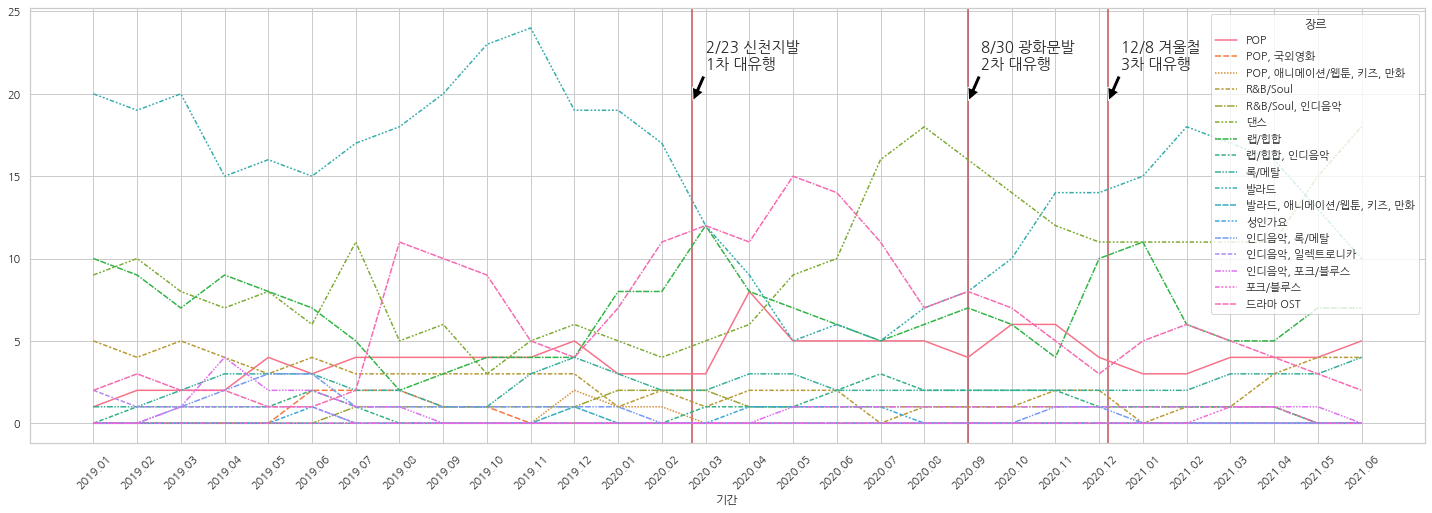

In [14]:
#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))
# sns.set(font_scale=1.5)
# sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)


#코로나 진행상황별 annotation 넣기     출처 :http://omz-software.com/pythonista/matplotlib/users/text_intro.html
plt.axvline(x=13.7,c='r') #세로줄 삽입
plt.annotate('2/23 신천지발\n1차 대유행', xy=(13.7, 19.5), xytext=(14, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

plt.axvline(x=20,c='r')
plt.annotate('8/30 광화문발\n2차 대유행', xy=(20, 19.5), xytext=(20.3, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )


plt.axvline(x=23.2,c='r')
plt.annotate('12/8 겨울철\n3차 대유행', xy=(23.2, 19.5), xytext=(23.5, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

#x축 티커 로테이트
plt.xticks(rotation=45)


sns.lineplot(data=a)

In [15]:
# 결과 그래프에서 발라드, 댄스, 드라마OST 만 빼서 보기
final_data = a[['발라드','댄스','드라마 OST','POP, 국외영화']]

final_data

장르,발라드,댄스,드라마 OST,"POP, 국외영화"
기간,,,,
2019.01,20.0,9.0,2.0,0.0
2019.02,19.0,10.0,3.0,0.0
2019.03,20.0,8.0,2.0,0.0
2019.04,15.0,7.0,2.0,0.0
2019.05,16.0,8.0,1.0,0.0
2019.06,15.0,6.0,1.0,2.0
2019.07,17.0,11.0,2.0,2.0
2019.08,18.0,5.0,11.0,2.0
2019.09,20.0,6.0,10.0,1.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

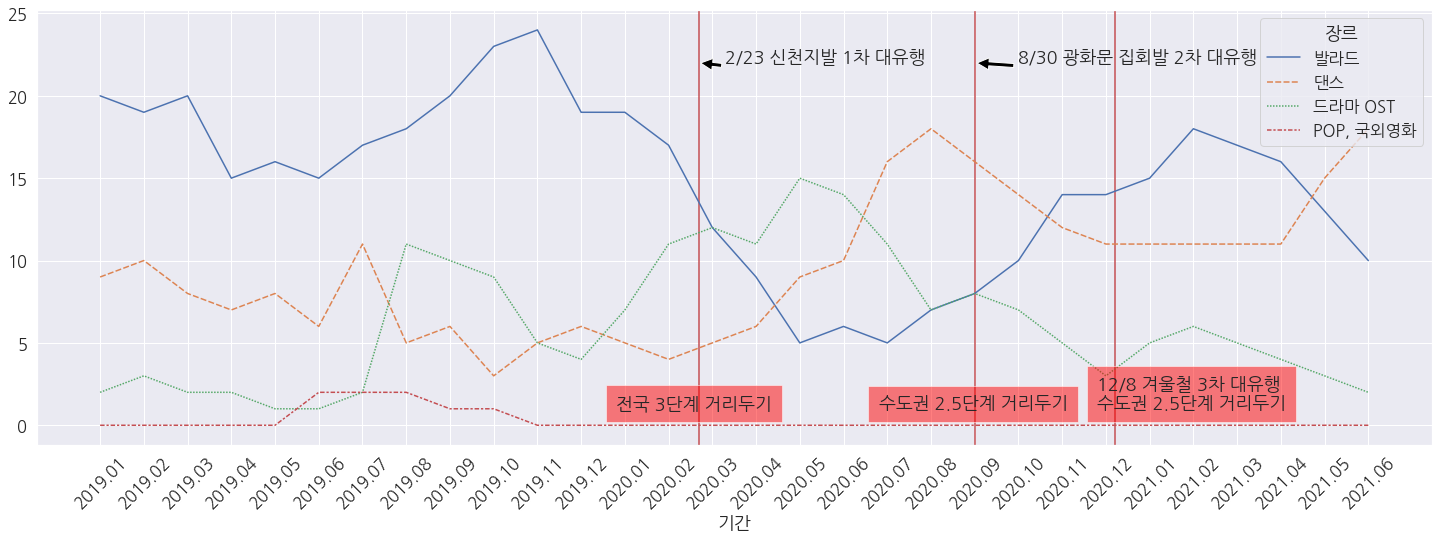

In [16]:
#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))
sns.set(font_scale=1.5)
# sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)

#코로나 진행상황별 annotation 넣기     출처 :http://omz-software.com/pythonista/matplotlib/users/text_intro.html
plt.axvline(x=13.7,c='r') #세로줄 삽입
plt.text(11.8, 1, '전국 3단계 거리두기', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('2/23 신천지발 1차 대유행', xy=(13.7, 22), xytext=(14.3, 22),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.axvline(x=20,c='r')
plt.text(17.8, 1, '수도권 2.5단계 거리두기', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('8/30 광화문 집회발 2차 대유행', xy=(20, 22), xytext=(21, 22),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.axvline(x=23.2,c='r')
plt.text(22.8, 1, '12/8 겨울철 3차 대유행 \n수도권 2.5단계 거리두기', style='italic',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})

# plt.axvline(x=13.7,c='r')
# plt.text(11.8, 22, '2/18 1차 유행 \n(신천지교회발)', style='italic',
#         bbox={'facecolor':'red', 'alpha':0.3, 'pad':10})



sns.lineplot(data=final_data)

#라벨끼리 너무 겹쳐서 라벨 각도를 돌렸다
plt.xticks(rotation=45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

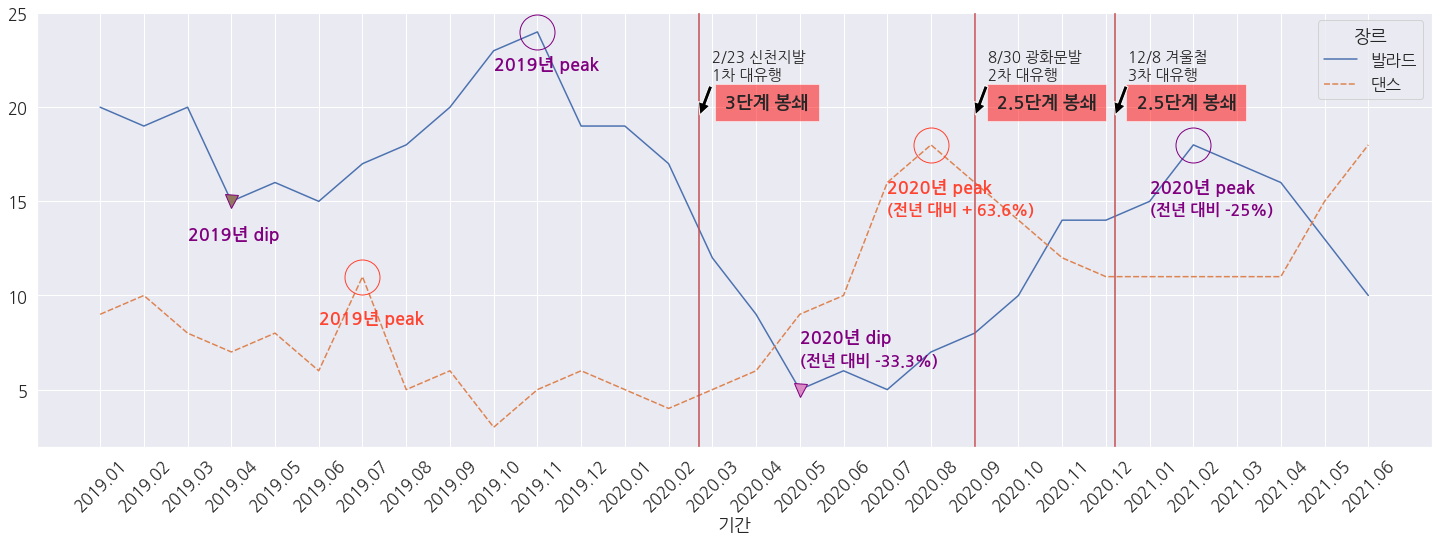

In [17]:
#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))
sns.set(font_scale=1.5)
# sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)


sns.lineplot(data=final_data[['발라드','댄스']])


#코로나 진행상황별 annotation 넣기     출처 :http://omz-software.com/pythonista/matplotlib/users/text_intro.html
plt.axvline(x=13.7,c='r') #세로줄 삽입
plt.text(14.3, 20, '3단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('2/23 신천지발\n1차 대유행', xy=(13.7, 19.5), xytext=(14, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

plt.axvline(x=20,c='r')
plt.text(20.5, 20, '2.5단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('8/30 광화문발\n2차 대유행', xy=(20, 19.5), xytext=(20.3, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )


plt.axvline(x=23.2,c='r')
plt.text(23.7, 20, '2.5단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('12/8 겨울철\n3차 대유행', xy=(23.2, 19.5), xytext=(23.5, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

#피크 지점에 동그라미 넣기  #컬러코드 출처: https://htmlcolorcodes.com/
plt.plot(6,final_data.loc['2019.07','댄스'], 'o',ms=35,fillstyle='none',markeredgecolor = '#FF4431',linestyle='--')
plt.plot(19,final_data.loc['2020.08','댄스'], 'o',ms=35,fillstyle='none',markeredgecolor = '#FF4431',linestyle='--')

plt.plot(10,final_data.loc['2019.11','발라드'], 'o',ms=35,fillstyle='none',markeredgecolor = 'purple',linestyle='--')
plt.plot(25,final_data.loc['2021.02','발라드'], 'o',ms=35,fillstyle='none',markeredgecolor = 'purple',linestyle='--')

#dip 지점 동그라미 넣기
plt.plot(3,final_data.loc['2019.04','발라드'], 'v',ms=13,fillstyle='full',markeredgecolor = 'purple',linestyle='--')
plt.plot(16,final_data.loc['2020.05','발라드'], 'v',ms=13,fillstyle='full',markeredgecolor = 'purple',linestyle='--')


#피크 지점 증가율 넣기
#댄스
plt.text(6-1,final_data.loc['2019.07','댄스']-2.5, '2019년 peak'
         , weight='semibold',c='#FF4431')

plt.text(19-1,final_data.loc['2020.08','댄스']-2.5, '2020년 peak'
         , weight='semibold',c='#FF4431')
plt.text(19-1,final_data.loc['2020.08','댄스']-3.7, '(전년 대비 + 63.6%)'
         , weight='semibold', size=16,c='#FF4431')
#발라드
plt.text(10-1,final_data.loc['2019.11','발라드']-2, '2019년 peak'
         , weight='semibold',c='purple')

plt.text(25-1,final_data.loc['2021.02','발라드']-2.5, '2020년 peak'
         , weight='semibold',c='purple')
plt.text(25-1,final_data.loc['2021.02','발라드']-3.7, '(전년 대비 -25%)'
         , weight='semibold' ,size=16,c='purple')


#딥 지점 감소율 넣기

plt.text(2,final_data.loc['2019.04','발라드']-2, '2019년 dip'
         , weight='semibold',c='purple')

plt.text(15+1,final_data.loc['2020.05','발라드']-2.5+5, '2020년 dip'
         , weight='semibold',c='purple')
plt.text(15+1,final_data.loc['2020.05','발라드']-3.7+5, '(전년 대비 -33.3%)'
         , weight='semibold' ,size=16,c='purple')


#라벨끼리 너무 겹쳐서 라벨 각도를 돌렸다
plt.xticks(rotation=45)

- 고쳐야 할 점: 기간명이 너무 정신없게 빽빽하게 나와서 읽을 수가 없다. 수정필요함 (ㅇ) 완료
- 더 분석할 점: 표에는 나오지 않았지만 코로나 이전 외국영화 ost도 차트에 많이 있었는데 코로나 이후로는 한번도 차트에 오른 적이 없다.


- 임시 결론(?): 2019년 데이터로 봤을 때 원래도 여름철에 댄스 장르 선호가 조금 더 올라가고 발라드 장르 선호가 조금 떨어지는 경향이 있음. 그러나 코로나19 이후 발라드 장르 소비가 눈에 띄게 떨어지고 댄스 장르 선호도 2019년보다 많이 오름. 그래서 코로나19의 유행과 봉쇄가 발라드 선호를 떨어뜨리고 댄스 선호를 증가시켰다고 볼 수 있다.
- 또 드라마 OST도 2019년에 비해 많이 들었다. 특히 2020년 5월 드라마 OST 선호도 피크는 전년도 드라마 OST 피크 대비 약 25% 증가한 수치이며, 3월 봉쇄의 영향으로 드라마 시청률이 늘며 드라마 OST의 인기 또한 증가했다고 볼 수 있다. 한편, 그래프에는 나와있지 않지만 해외영화 OST의 경우 2019년도 총 8곡이 멜론차트에 진입했는데 2020년 이후로는 차트에 한 곡도 진입하지 못했다. 이 또한 코로나19로 인해 영화 개봉이 연기되거나 사람들이 영화를 보러 영화관에 가지 않았던 영향이 있었던 것으로 해석된다.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

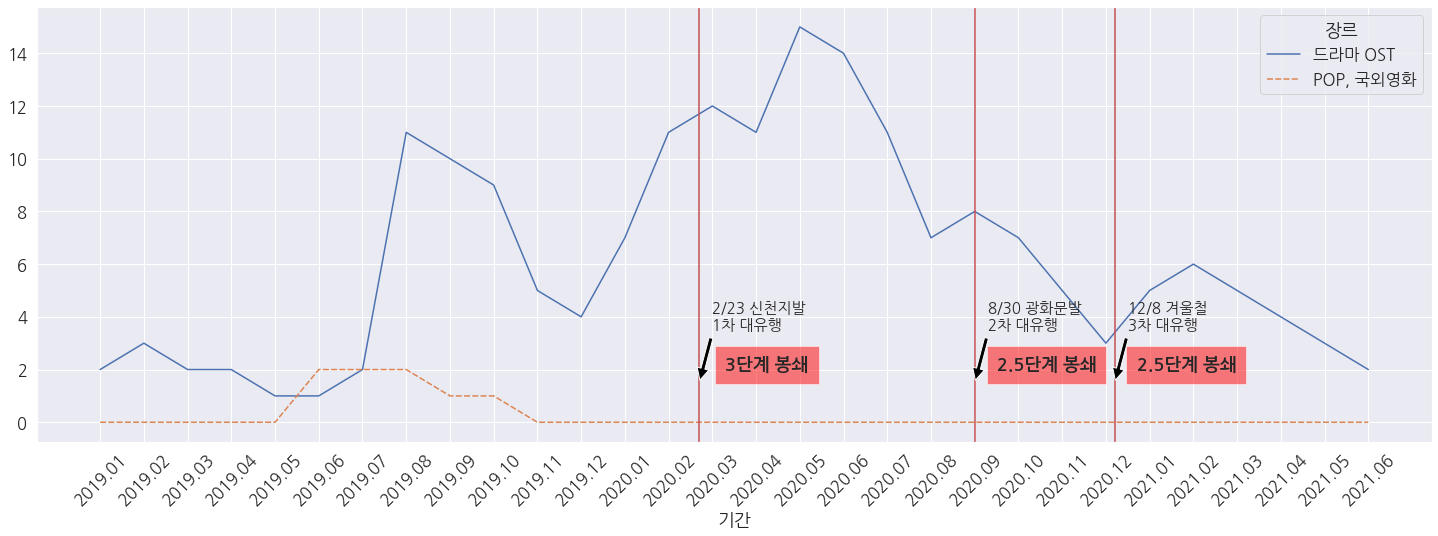

In [18]:
#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))
sns.set(font_scale=1.5)
# sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)


sns.lineplot(data=final_data[['드라마 OST','POP, 국외영화']])


#코로나 진행상황별 annotation 넣기     출처 :http://omz-software.com/pythonista/matplotlib/users/text_intro.html
plt.axvline(x=13.7,c='r') #세로줄 삽입
plt.text(14.3, 20-18, '3단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('2/23 신천지발\n1차 대유행', xy=(13.7, 19.5-18), xytext=(14, 21.5-18),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

plt.axvline(x=20,c='r')
plt.text(20.5, 20-18, '2.5단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('8/30 광화문발\n2차 대유행', xy=(20, 19.5-18), xytext=(20.3, 21.5-18),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

plt.axvline(x=23.2,c='r')
plt.text(23.7, 20-18, '2.5단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('12/8 겨울철\n3차 대유행', xy=(23.2, 19.5-18), xytext=(23.5, 21.5-18),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

# #피크 지점에 동그라미 넣기
# plt.plot(6,final_data.loc['2019.07','댄스'], 'o',ms=35,fillstyle='none',markeredgecolor = '#FF4431',linestyle='--')
# plt.plot(19,final_data.loc['2020.08','댄스'], 'o',ms=35,fillstyle='none',markeredgecolor = '#FF4431',linestyle='--')
# plt.plot(10,final_data.loc['2019.11','발라드'], 'o',ms=35,fillstyle='none',markeredgecolor = 'purple',linestyle='--')
# plt.plot(25,final_data.loc['2021.02','발라드'], 'o',ms=35,fillstyle='none',markeredgecolor = 'purple',linestyle='--')

#컬러코드 출처: https://htmlcolorcodes.com/



#라벨끼리 너무 겹쳐서 라벨 각도를 돌렸다
plt.xticks(rotation=45)

# 코로나19 전후 장르 변화와 우울평균점수/자살생각비율 그래프

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

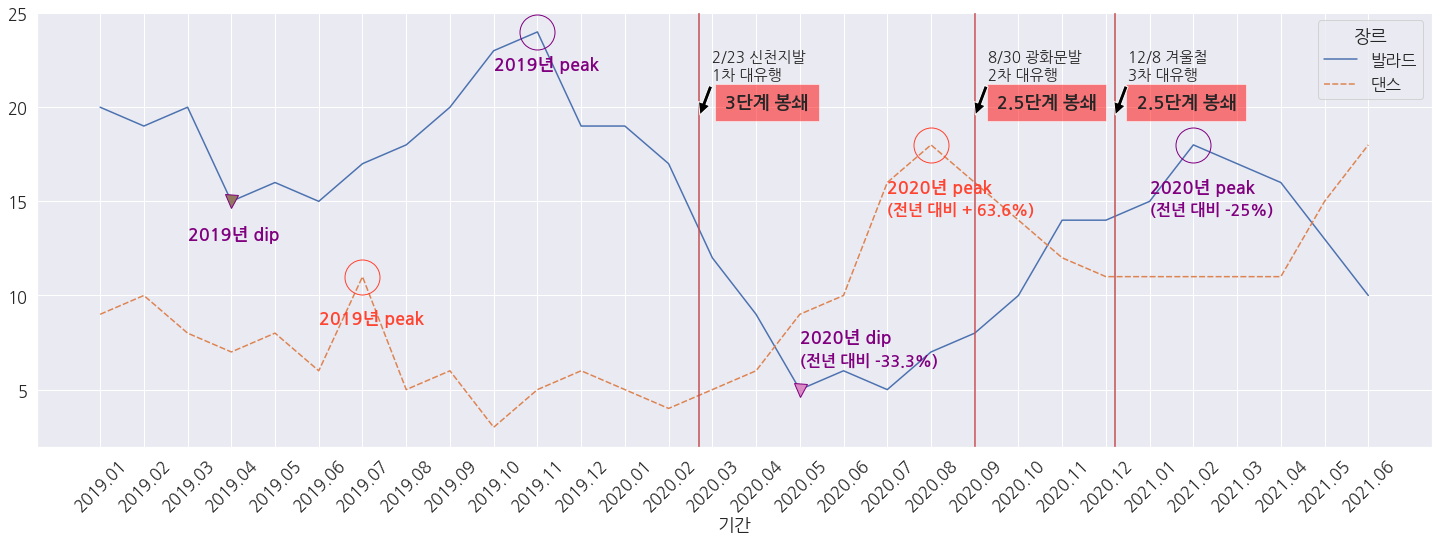

In [19]:
#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))
sns.set(font_scale=1.5)
# sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)


sns.lineplot(data=final_data[['발라드','댄스']])


#코로나 진행상황별 annotation 넣기     출처 :http://omz-software.com/pythonista/matplotlib/users/text_intro.html
plt.axvline(x=13.7,c='r') #세로줄 삽입
plt.text(14.3, 20, '3단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('2/23 신천지발\n1차 대유행', xy=(13.7, 19.5), xytext=(14, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

plt.axvline(x=20,c='r')
plt.text(20.5, 20, '2.5단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('8/30 광화문발\n2차 대유행', xy=(20, 19.5), xytext=(20.3, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )


plt.axvline(x=23.2,c='r')
plt.text(23.7, 20, '2.5단계 봉쇄', weight='semibold',
        bbox={'facecolor':'red', 'alpha':0.5, 'pad':10})
plt.annotate('12/8 겨울철\n3차 대유행', xy=(23.2, 19.5), xytext=(23.5, 21.5),
            arrowprops=dict(facecolor='black', shrink=0.05),size=15
            )

#피크 지점에 동그라미 넣기  #컬러코드 출처: https://htmlcolorcodes.com/
plt.plot(6,final_data.loc['2019.07','댄스'], 'o',ms=35,fillstyle='none',markeredgecolor = '#FF4431',linestyle='--')
plt.plot(19,final_data.loc['2020.08','댄스'], 'o',ms=35,fillstyle='none',markeredgecolor = '#FF4431',linestyle='--')

plt.plot(10,final_data.loc['2019.11','발라드'], 'o',ms=35,fillstyle='none',markeredgecolor = 'purple',linestyle='--')
plt.plot(25,final_data.loc['2021.02','발라드'], 'o',ms=35,fillstyle='none',markeredgecolor = 'purple',linestyle='--')

#dip 지점 동그라미 넣기
plt.plot(3,final_data.loc['2019.04','발라드'], 'v',ms=13,fillstyle='full',markeredgecolor = 'purple',linestyle='--')
plt.plot(16,final_data.loc['2020.05','발라드'], 'v',ms=13,fillstyle='full',markeredgecolor = 'purple',linestyle='--')


#피크 지점 증가율 넣기
#댄스
plt.text(6-1,final_data.loc['2019.07','댄스']-2.5, '2019년 peak'
         , weight='semibold',c='#FF4431')

plt.text(19-1,final_data.loc['2020.08','댄스']-2.5, '2020년 peak'
         , weight='semibold',c='#FF4431')
plt.text(19-1,final_data.loc['2020.08','댄스']-3.7, '(전년 대비 + 63.6%)'
         , weight='semibold', size=16,c='#FF4431')
#발라드
plt.text(10-1,final_data.loc['2019.11','발라드']-2, '2019년 peak'
         , weight='semibold',c='purple')

plt.text(25-1,final_data.loc['2021.02','발라드']-2.5, '2020년 peak'
         , weight='semibold',c='purple')
plt.text(25-1,final_data.loc['2021.02','발라드']-3.7, '(전년 대비 -25%)'
         , weight='semibold' ,size=16,c='purple')


#딥 지점 감소율 넣기

plt.text(2,final_data.loc['2019.04','발라드']-2, '2019년 dip'
         , weight='semibold',c='purple')

plt.text(15+1,final_data.loc['2020.05','발라드']-2.5+5, '2020년 dip'
         , weight='semibold',c='purple')
plt.text(15+1,final_data.loc['2020.05','발라드']-3.7+5, '(전년 대비 -33.3%)'
         , weight='semibold' ,size=16,c='purple')


#라벨끼리 너무 겹쳐서 라벨 각도를 돌렸다
plt.xticks(rotation=45)

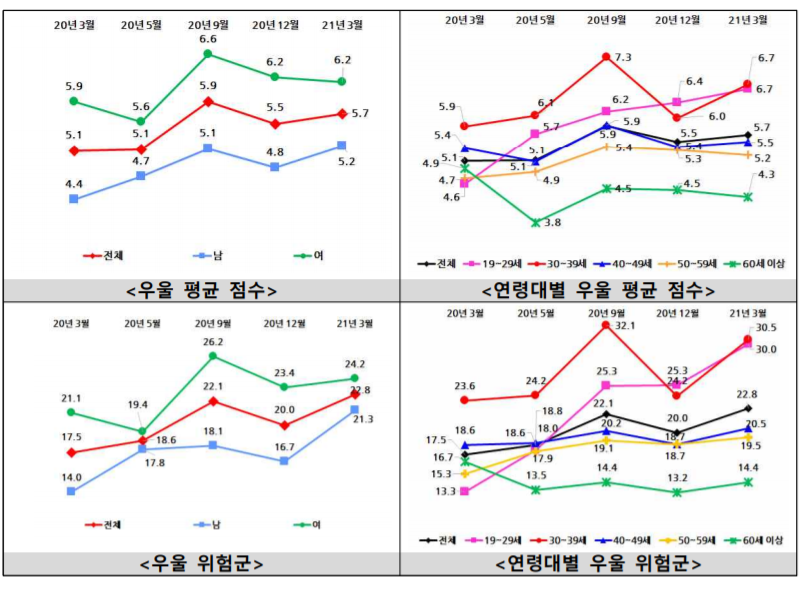# 

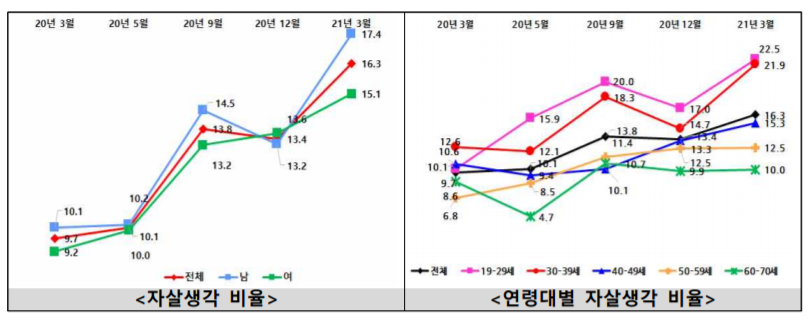

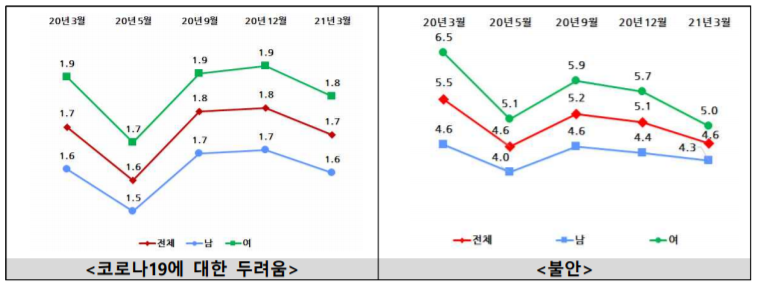

# 감정변화와 댄스 선호에 대한 데이터 프레임 만들기

In [221]:
depression_level = {'2020.03': 5.1,'2020.05': 5.1,'2020.09': 5.9,'2020.12': 5.5,'2021.03':5.7}
suicidal_ideation = {'2020.03': 9.7,'2020.05': 10.1,'2020.09': 13.8,'2020.12': 13.4,'2021.03':16.3}
fear = {'2020.03': 1.7,'2020.05': 1.6,'2020.09': 1.8,'2020.12': 1.8,'2021.03':1.7}
insecureness = {'2020.03': 5.5,'2020.05': 4.6,'2020.09': 5.2,'2020.12': 5.1,'2021.03':6.4}
df_phy=pd.DataFrame([depression_level,suicidal_ideation,fear,insecureness]).T
df_phy.columns = ['우울 평균 점수','자살 생각 비율','코로나19에 대한 두려움','불안']
df_phy

,우울 평균 점수,자살 생각 비율,코로나19에 대한 두려움,불안
2020.03,5.1,9.7,1.7,5.5
2020.05,5.1,10.1,1.6,4.6
2020.09,5.9,13.8,1.8,5.2
2020.12,5.5,13.4,1.8,5.1
2021.03,5.7,16.3,1.7,6.4


In [222]:
#어....일단 수동으로 완성..?
df_phy.loc['2020.04',:]=((df_phy.loc['2020.05',:]-df_phy.loc['2020.03',:])*1/3)+df_phy.loc['2020.03',:]
df_phy.loc['2020.05',:]=((df_phy.loc['2020.05',:]-df_phy.loc['2020.03',:])*2/3)+df_phy.loc['2020.03',:]

df_phy.loc['2020.06',:]=((df_phy.loc['2020.09',:]-df_phy.loc['2020.05',:])*1/4)+df_phy.loc['2020.05',:]
df_phy.loc['2020.07',:]=((df_phy.loc['2020.09',:]-df_phy.loc['2020.05',:])*2/4)+df_phy.loc['2020.05',:]
df_phy.loc['2020.08',:]=((df_phy.loc['2020.09',:]-df_phy.loc['2020.05',:])*3/4)+df_phy.loc['2020.05',:]

df_phy.loc['2020.10',:]=((df_phy.loc['2020.12',:]-df_phy.loc['2020.09',:])*1/3)+df_phy.loc['2020.09',:]
df_phy.loc['2020.11',:]=((df_phy.loc['2020.12',:]-df_phy.loc['2020.09',:])*2/3)+df_phy.loc['2020.09',:]

df_phy.loc['2021.01',:]=((df_phy.loc['2021.03',:]-df_phy.loc['2020.12',:])*1/3)+df_phy.loc['2020.12',:]
df_phy.loc['2021.02',:]=((df_phy.loc['2021.03',:]-df_phy.loc['2020.12',:])*2/3)+df_phy.loc['2020.12',:]
df_phy.sort_index()

,우울 평균 점수,자살 생각 비율,코로나19에 대한 두려움,불안
2020.03,5.100000,9.700000,1.700000,5.500000
2020.04,5.100000,9.833333,1.666667,5.200000
2020.05,5.100000,9.966667,1.633333,4.900000
2020.06,5.300000,10.925000,1.675000,4.975000
2020.07,5.500000,11.883333,1.716667,5.050000
2020.08,5.700000,12.841667,1.758333,5.125000
2020.09,5.900000,13.800000,1.800000,5.200000
2020.10,5.766667,13.666667,1.800000,5.166667
2020.11,5.633333,13.533333,1.800000,5.133333
2020.12,5.500000,13.400000,1.800000,5.100000


In [223]:
df_phy.sort_index()

,우울 평균 점수,자살 생각 비율,코로나19에 대한 두려움,불안
2020.03,5.100000,9.700000,1.700000,5.500000
2020.04,5.100000,9.833333,1.666667,5.200000
2020.05,5.100000,9.966667,1.633333,4.900000
2020.06,5.300000,10.925000,1.675000,4.975000
2020.07,5.500000,11.883333,1.716667,5.050000
2020.08,5.700000,12.841667,1.758333,5.125000
2020.09,5.900000,13.800000,1.800000,5.200000
2020.10,5.766667,13.666667,1.800000,5.166667
2020.11,5.633333,13.533333,1.800000,5.133333
2020.12,5.500000,13.400000,1.800000,5.100000


In [224]:
music_dat = final_data.drop(['2021.04','2021.05','2021.06'])
music_dat.tail()

장르,발라드,댄스,드라마 OST,"POP, 국외영화"
기간,,,,
2020.11,14.0,12.0,5.0,0.0
2020.12,14.0,11.0,3.0,0.0
2021.01,15.0,11.0,5.0,0.0
2021.02,18.0,11.0,6.0,0.0
2021.03,17.0,11.0,5.0,0.0


In [225]:
music_phy = music_dat.join(df_phy)
music_phy = music_phy.iloc[-13:,:]
music_phy.head()

,발라드,댄스,드라마 OST,"POP, 국외영화",우울 평균 점수,자살 생각 비율,코로나19에 대한 두려움,불안
기간,,,,,,,,
2020.03,12.0,5.0,12.0,0.0,5.1,9.700000,1.700000,5.500
2020.04,9.0,6.0,11.0,0.0,5.1,9.833333,1.666667,5.200
2020.05,5.0,9.0,15.0,0.0,5.1,9.966667,1.633333,4.900
2020.06,6.0,10.0,14.0,0.0,5.3,10.925000,1.675000,4.975
2020.07,5.0,16.0,11.0,0.0,5.5,11.883333,1.716667,5.050


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

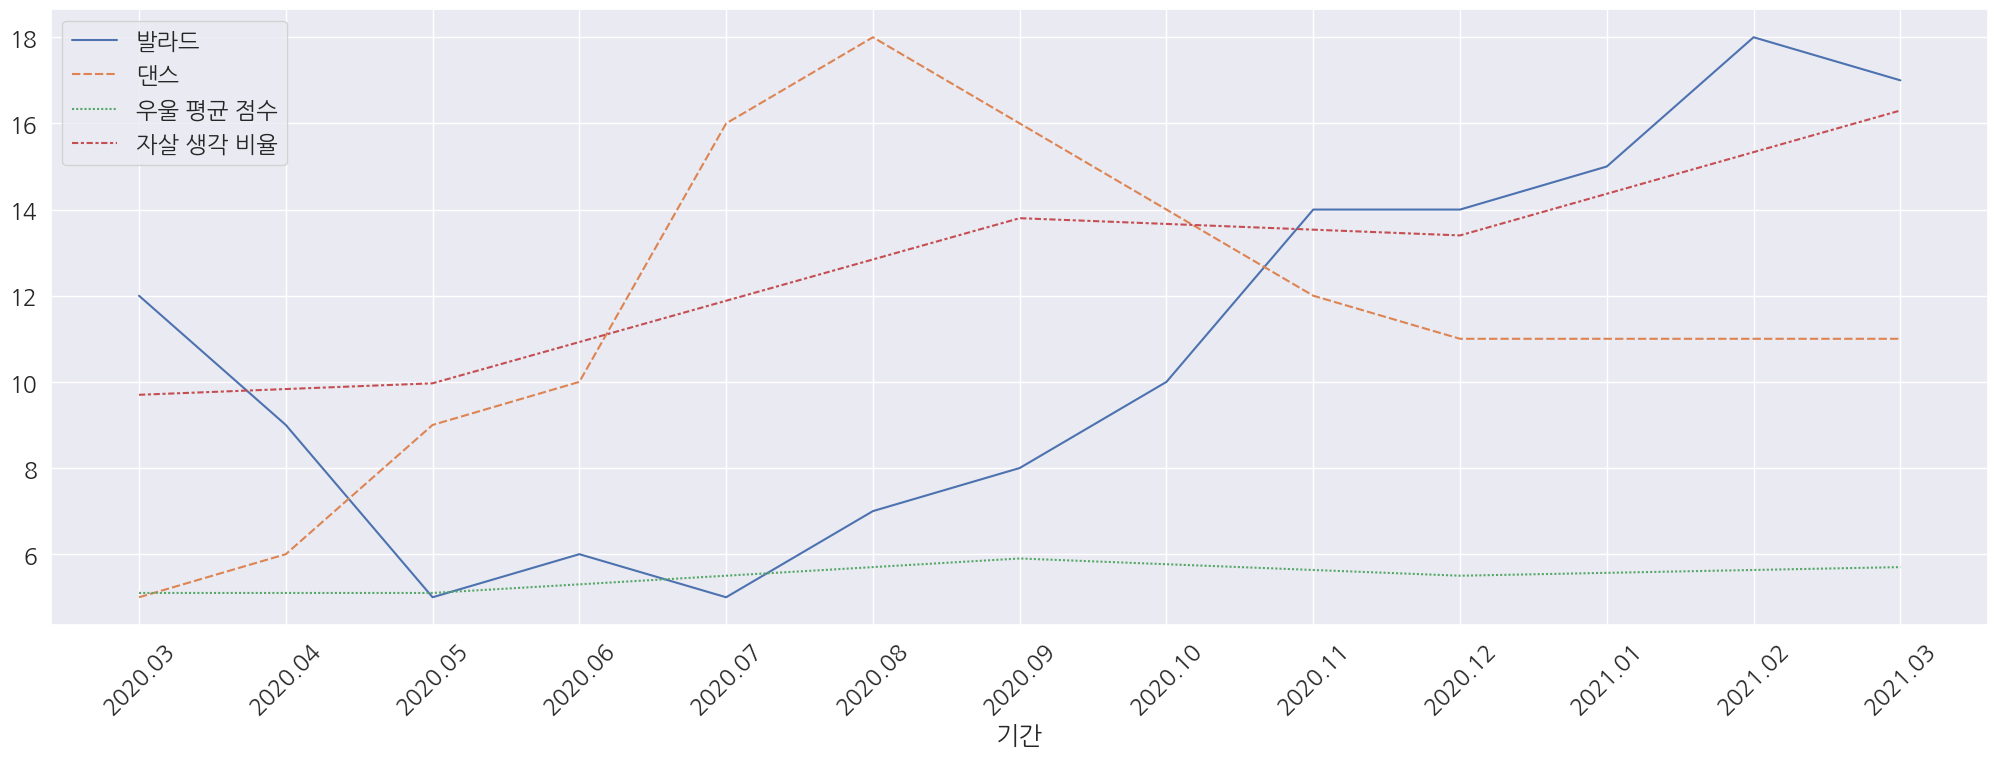

In [226]:
music_phy = music_phy.drop(['드라마 OST','POP, 국외영화','코로나19에 대한 두려움','불안'],axis=1)

#테마/폰트설정 (꼭 한글폰트 설정보다 먼저 오게 할것)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(25, 8))
sns.set(font_scale=1.5)
# sns.set_color_codes("pastel")

#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18
plt.rc('font', family=font_name)


# g = sns.catplot(
#     data=df_phy, kind="bar",
#     x="species", y="body_mass_g", hue="sex",
#     ci="sd", palette="dark", alpha=.6, height=6
# )
sns.lineplot(data=music_phy)
# sns.barplot(x='기간',y='밸류',hue='척도',data=df_phy1)

# sns.lineplot(data=final_data.iloc[10:,0:2])
plt.xticks(rotation=45)

In [232]:
music_phy.index

Index(['2020.03', '2020.04', '2020.05', '2020.06', '2020.07', '2020.08',
       '2020.09', '2020.10', '2020.11', '2020.12', '2021.01', '2021.02',
       '2021.03'],
      dtype='object', name='기간')

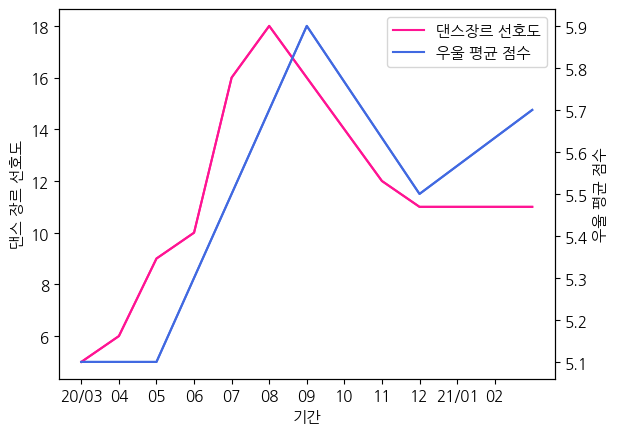

In [256]:
#출처 : https://codetorial.net/matplotlib/double_y_axis.html
import matplotlib.pyplot as plt


#한글 폰트 설정
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rcParams['font.size'] = 18


plt.style.use('default')
# plt.rcParams['figure.figsize'] = (6.5, 3)
plt.rcParams['font.size'] = 11
plt.rc('font', family=font_name)

x = np.arange(0, 13)
y1 = music_phy['댄스']
y2 = music_phy['우울 평균 점수']

fig, ax1 = plt.subplots()
ax1.set_xlabel('기간')
ax1.set_ylabel('댄스 장르 선호도')
line1 = ax1.plot(x, y1, color='deeppink', label='댄스장르 선호도')
ax1.plot(x, y1, color='deeppink')

ax2 = ax1.twinx()
ax2.set_ylabel('우울 평균 점수')
line2 = ax2.plot(x, y2, color='royalblue', label='우울 평균 점수')
ax2.plot(x, y2, color='royalblue')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')

import numpy as np
plt.xticks(np.arange(0, 12), labels=['20/03', '04', '05', '06', '07', '08',
       '09', '10', '11', '12', '21/01', '02'])

plt.show()

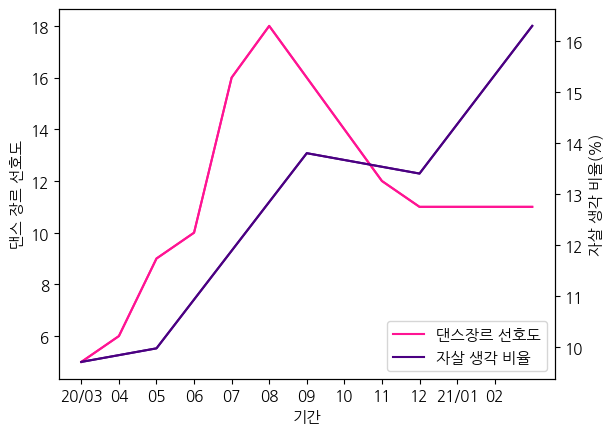

In [258]:
import matplotlib.pyplot as plt

plt.style.use('default')
# plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 11
plt.rc('font', family=font_name)

x = np.arange(0, 13)
y1 = music_phy['댄스']
y2 = music_phy['자살 생각 비율']

fig, ax1 = plt.subplots()
ax1.set_xlabel('기간')
ax1.set_ylabel('댄스 장르 선호도')
line1 = ax1.plot(x, y1, color='deeppink', label='댄스장르 선호도')
ax1.plot(x, y1, color='deeppink')

ax2 = ax1.twinx()
ax2.set_ylabel('자살 생각 비율(%)')
line2 = ax2.plot(x, y2, color='indigo', label='자살 생각 비율')
ax2.plot(x, y2, color='indigo')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right')

import numpy as np
plt.xticks(np.arange(0, 12), labels=['20/03', '04', '05', '06', '07', '08',
       '09', '10', '11', '12', '21/01', '02'])
plt.show()

#https://matplotlib.org/stable/gallery/color/named_colors.html  색상

In [178]:
temp = list() #columns
index_ = list()
values = list()

n=0
while n<4:
    for i in range(5):
        temp.append(df_phy.columns[n])
    n +=1

for i in range(4):
    for n in df_phy.index:
        index_.append(n)
n=0
while n<4:
    for i in range(4):
        values.append(df_phy[df_phy.columns[n]][i])
    n +=1
df_phy1 = pd.DataFrame([temp, index_,values]).T
df_phy1.columns = ['척도','기간','밸류']
df_phy1

,척도,기간,밸류
0,우울 평균 점수,2020.03,5.1
1,우울 평균 점수,2020.05,5.1
2,우울 평균 점수,2020.09,5.9
3,우울 평균 점수,2020.12,5.5
4,우울 평균 점수,2021.03,9.7
5,자살 생각 비율,2020.04,9.73512
6,자살 생각 비율,2020.06,13.8
7,자살 생각 비율,2020.07,13.4
8,자살 생각 비율,2020.08,1.7
9,자살 생각 비율,2020.10,1.69122


In [94]:
# 한 주의 요일(0: 일, 1: 월 ~ 6: 토)
# days = [0, 1, 2, 3, 4, 5, 6]
# # 내가 사용한 돈(천원)
# money_spent = [10, 12, 12, 10, 14, 22, 24]
# # 친구가 사용한 돈(천원)
# money_spent_2 = [11, 14, 15, 15, 22, 21, 12]
# 내가 사용한 돈을 그래프로 그립니다
sns.lineplot(x='기간', y='밸류', data = final_data.iloc[10:,0:2])
# # 같은 그림에 친구가 사용한 돈도 그래프로 그립니다
# plt.plot(days, money_spent_2)
# # 화면에 그래프를 보여줍니다
plt.show()

ValueError: Could not interpret value `밸류` for parameter `y`

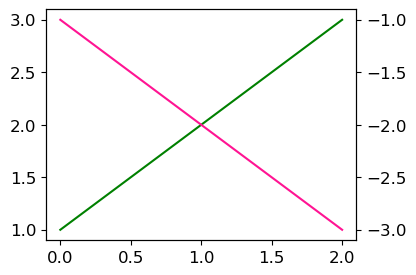

In [49]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams['figure.figsize'] = (4, 3)
plt.rcParams['font.size'] = 12

x = np.arange(0, 3)
y1 = x + 1
y2 = -x - 1

fig, ax1 = plt.subplots()
ax1.plot(x, y1, color='green')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='deeppink')

plt.show()

In [218]:
df_phy.loc['2021.04',:] = ['0','0','0','0']
df_phy.loc['2021.05',:] = ['0','0','0','0']
df_phy.loc['2021.06',:] = ['0','0','0','0']
df_phy

,우울 평균 점수,자살 생각 비율,코로나19에 대한 두려움,불안
2020.03,5.1,9.7,1.7,5.5
2020.05,5.1,9.96667,1.63333,4.9
2020.09,5.9,13.8,1.8,5.2
2020.12,5.5,13.4,1.8,5.1
2021.03,5.7,16.3,1.7,6.4
2020.04,5.1,9.83333,1.66667,5.2
2020.06,5.3,10.925,1.675,4.975
2020.07,5.5,11.8833,1.71667,5.05
2020.08,5.7,12.8417,1.75833,5.125
2020.10,5.76667,13.6667,1.8,5.16667


In [219]:
music_phy = final_data.join(df_phy)
music_phy
music_phy = music_phy.iloc[-16:,:]
music_phy.tail()

,발라드,댄스,드라마 OST,"POP, 국외영화",우울 평균 점수,자살 생각 비율,코로나19에 대한 두려움,불안
기간,,,,,,,,
2021.02,18.0,11.0,6.0,0.0,5.63333,15.3333,1.73333,5.96667
2021.03,17.0,11.0,5.0,0.0,5.7,16.3,1.7,6.4
2021.04,16.0,11.0,4.0,0.0,0,0,0,0
2021.05,13.0,15.0,3.0,0.0,0,0,0,0
2021.06,10.0,18.0,2.0,0.0,0,0,0,0
